#Hypothesis Testing- Finding if running a marketing campaign impacts average miles driven per hour by Uber drivers

In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from pylab import rcParams
rcParams['figure.figsize'] = (30, 10)
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Data Acquisition and simple exploration


In [4]:
SFO = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQtyJ2QzbPxxbytWfGlzeyh6d0peQzRFbyGkWlvqmSqMd0rZL3k6LU2rlITxWpXQDFVwhYZm3m4mI1W/pub?gid=1680609253&single=true&output=csv"
LAX = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT0J_ncTF5NHHrmvbu7-uEnLJMu7PPObG44A9J1cExt26899VJUP_lbuSDDnYV7zbgTaUISrBuXO6Tt/pub?gid=2012250651&single=true&output=csv"
SFO_df = pd.read_csv(SFO)
LAX_df = pd.read_csv(LAX)


In [6]:
SFO_df.head()

,Date,SFO - Avg. Daily Miles Driven Per Hour,Marketing_Campaign,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,09/14/2019,66.193059,0,NaN,NaN,NaN,NaN
1,09/15/2019,56.001541,0,NaN,NaN,NaN,NaN
2,09/16/2019,51.603110,0,NaN,NaN,NaN,NaN
3,09/17/2019,91.855106,0,NaN,NaN,NaN,NaN
4,09/18/2019,90.528779,0,NaN,NaN,NaN,NaN


In [7]:
LAX_df.tail()

,Date,LAX - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
98,12/21/2019,185.457649,1
99,12/22/2019,163.197887,1
100,12/23/2019,118.769858,1
101,12/24/2019,180.536785,0
102,12/25/2019,199.180194,0


# Data description:

There are 3 columns in each dataset i.e. SFO and LAX:

**Date:** This is the date on which the records were noted.

**Avg. Daily Miles Driven Per Hour:** The avg miles driven per hour when there was marketing campaign and no marketing campaign.

**Marketing Campaign:** This is divided into 2 categories. O is for no marketing campaign and 1 is for marketing campaign run.

# Test Setup for SFO and LAX:

**Null Hypothesis**: Avg miles driven per hour when there was no market campaign is equal to avg miles driven per hour when there was market campaign

**A** with No market campaign = **A** with market campaign

**Alternative Hypothesis**: Avg miles driven per hour when there was no market campaign is not equal to avg miles driven per hour when there was market campaign

**A** with no market campaign is not equal **A** with market campaign

The p value will be set to 0.05

In [8]:
SFO_df = SFO_df.drop(columns = ['Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'])

In [9]:
list(SFO_df)


['Date', 'SFO - Avg. Daily Miles Driven Per Hour', 'Marketing_Campaign']

In [10]:
list(LAX_df)

['Date', 'LAX - Avg. Daily Miles Driven Per Hour', 'Marketing_Campaign']

In [11]:
SFO_df.describe()

,SFO - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
count,103.000000,103.000000
mean,57.921832,0.281553
std,31.435823,0.451956
min,4.234134,0.000000
25%,39.408468,0.000000
50%,62.533259,0.000000
75%,80.776593,1.000000
max,120.291467,1.000000


In [12]:
LAX_df.describe()

,LAX - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
count,103.000000,103.000000
mean,120.376938,0.291262
std,63.048194,0.456566
min,-16.437231,0.000000
25%,73.041813,0.000000
50%,120.741151,0.000000
75%,163.136755,1.000000
max,294.202155,1.000000


#Analyzing SFO dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


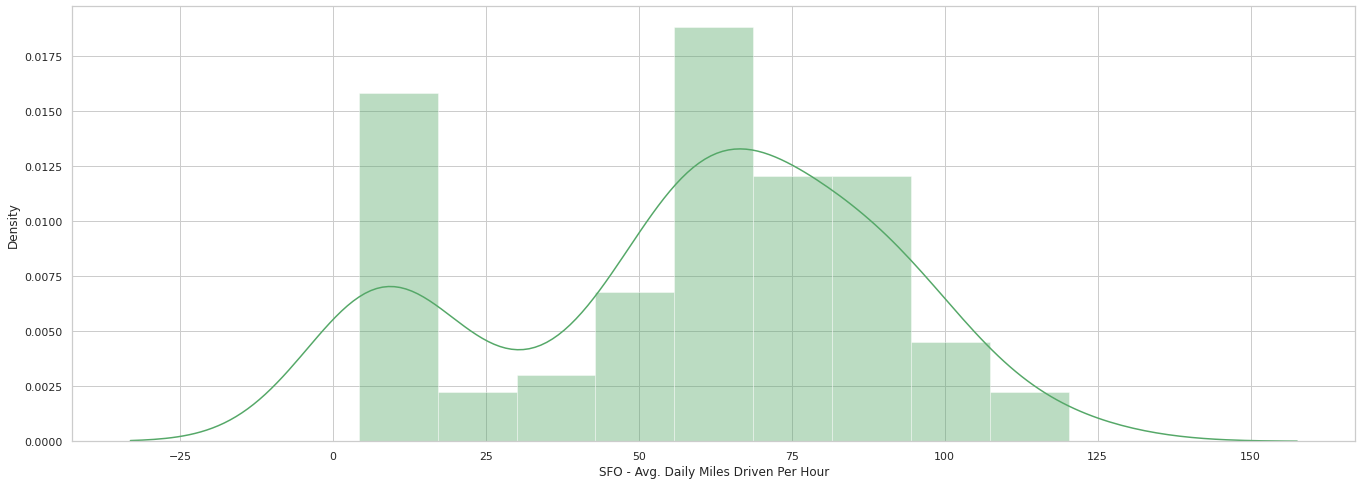

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(23,8))
sns.set(style='whitegrid')
dist = sns.distplot(SFO_df['SFO - Avg. Daily Miles Driven Per Hour'], color="g", bins = 9)

**Data visualization with marketing campaign and no marketing campaign**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


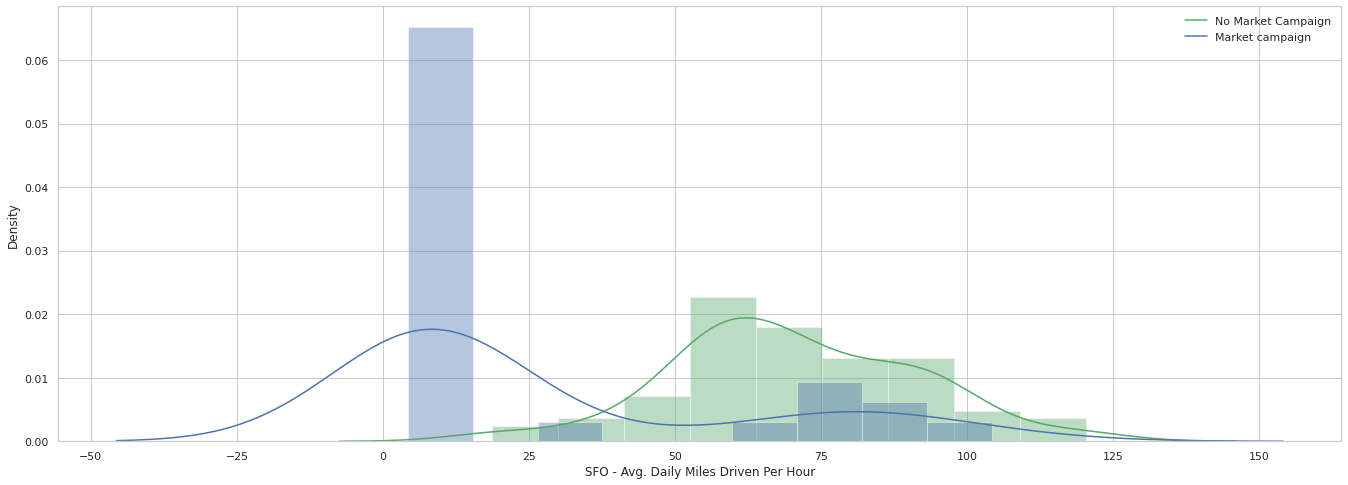

In [14]:
SFO1 = SFO_df['SFO - Avg. Daily Miles Driven Per Hour'].loc[SFO_df['Marketing_Campaign']==0]
SFO2 = SFO_df['SFO - Avg. Daily Miles Driven Per Hour'].loc[SFO_df['Marketing_Campaign']==1]

sns.set_style('whitegrid')
plt.figure(figsize=(23,8))
sns.set(style='whitegrid')
ax = sns.distplot(SFO1, hist=True, bins=9, color="g")
ax = sns.distplot(SFO2, hist=True, bins=9, color="b")
plt.legend(['No Market Campaign','Market campaign'])

In [15]:
SFO1

0      66.193059
1      56.001541
2      51.603110
3      91.855106
4      90.528779
         ...    
69     58.135222
70     75.323216
71     71.790283
101    98.722213
102    97.992925
Name: SFO - Avg. Daily Miles Driven Per Hour, Length: 74, dtype: float64

#Hypothesis testing


In [16]:
# Analysis of Variance test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import f_oneway

#generate three independent samples
SFO1 = SFO_df['SFO - Avg. Daily Miles Driven Per Hour'].loc[SFO_df['Marketing_Campaign']==0]
SFO2 = SFO_df['SFO - Avg. Daily Miles Driven Per Hour'].loc[SFO_df['Marketing_Campaign']==1]

#compare samples
stat, p = f_oneway(SFO1, SFO2)
print('Statistics=%.15f, p=%.15f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=67.052368916262225, p=0.000000000000842
Different distributions (reject H0)


#Analysis of SFO dataset:

The comparison is between avg miles driven per hour with market campaign and no market campaign

p-value is less than alpha which is 0.05, this means we will **reject the null hypothesis.**

**Result:**
Marketing campaign is successful in raising the avg miles driven per hour.

Alternative hypothesis is true which says that **A with no marketing campaign is not equal to A with market campaign**

**This means that Market campaign has impacted the avg miles driven by Uber drivers.** 

#Factors that may affect the validity of the study

There can be other factors that may play important role:

1. Incentives can be given to uber driver based on the miles they drive.
2. Upgrade drivers to different tiers.
3. Rating of drivers might impact their avg miles driven


#Analyzing LAX dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


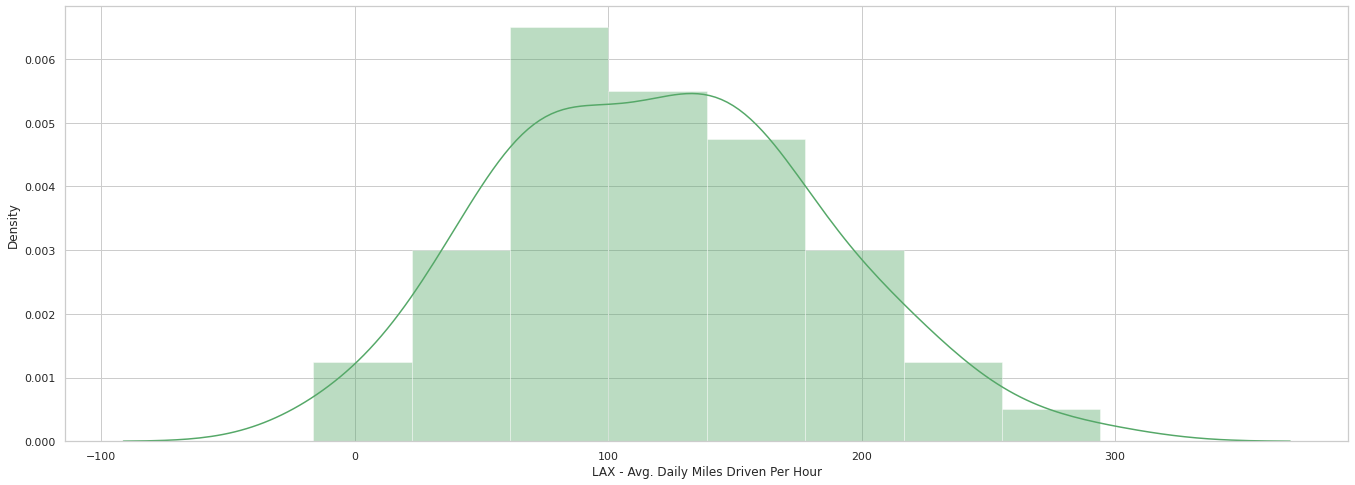

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(23,8))
sns.set(style='whitegrid')
ax = sns.distplot(LAX_df['LAX - Avg. Daily Miles Driven Per Hour'], bins = 8, color="g")

**Data visualization with marketing campaign and no marketing campaign**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


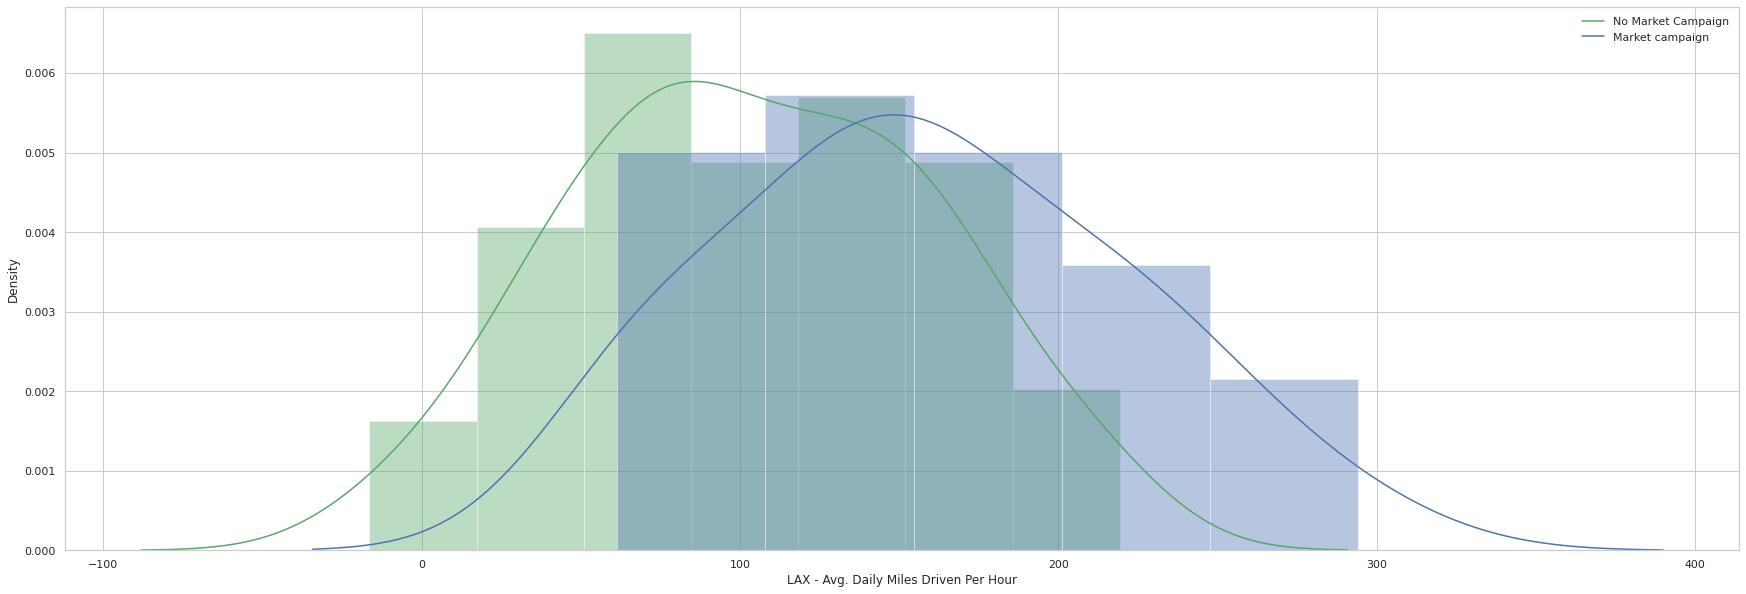

In [18]:
LAX1 = LAX_df['LAX - Avg. Daily Miles Driven Per Hour'].loc[LAX_df['Marketing_Campaign']==0]
LAX2 = LAX_df['LAX - Avg. Daily Miles Driven Per Hour'].loc[LAX_df['Marketing_Campaign']==1]

sns.set_style('whitegrid')
plt.figure(figsize=(30,10))
sns.set(style='whitegrid')
ax = sns.distplot(LAX1, hist=True, color="g")
ax = sns.distplot(LAX2, hist=True, color="b")
plt.legend(['No Market Campaign','Market campaign'])

#Hypothesis testing

In [19]:
# Analysis of Variance test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import f_oneway

#generate three independent samples
LAX1 = LAX_df['LAX - Avg. Daily Miles Driven Per Hour'].loc[LAX_df['Marketing_Campaign']==0]
LAX2 = LAX_df['LAX - Avg. Daily Miles Driven Per Hour'].loc[LAX_df['Marketing_Campaign']==1]

#compare samples
stat, p = f_oneway(LAX1, LAX2)
print('Statistics=%.15f, p=%.15f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')


Statistics=18.161918204098342, p=0.000045659767894
Different distributions (reject H0)


#Analysis of LAX dataset:

The comparison is between avg miles driven per hour with market campaign and no market campaign

p-value is less than alpha which is 0.05, this means we will **reject the null hypothesis.**

**Result:**
Marketing campaign is successful in raising the avg miles driven per hour.

Alternative hypothesis is true which says that **A with no marketing campaign is not qualt to A with marketing campaign**

**This means that marketing campaign has impacted the average miles drive by Uber drivers.**

#Factors that may affect the validity of the study

There can be other factors that may play important role:

1. Incentives can be given to uber driver based on the miles they drive.
2. Upgrade drivers to different tiers.
3. Rating of drivers might impact their avg miles driven